## Proyek Analisis Data: Bike Sharing Exploratory Data Analysis

- Nama: Mas'udin Nur Hidayat
- Email: masudinenha@gmail.com
- ID Dicoding: masudnh

## Business Question
1. Berapa jumlah rata - rata persewaan sepeda tiap jam dan bagaimana variasinya sepanjang hari?
2. Bagaimana hubungan kondisi cuaca dengan jumlah rata - rata persewaan?
3. Bagaimana hubungan antara hari libur tertentu dengan rata - rata penyewaan?
4. Pada bulan apa terjadi order terbanyak dalam periode 1 tahun?
5. Pada musim apa terjadi order terbanyak dalam periode 1 tahun?
6. Bagaimana korelasi antara suhu terhadap total order bike riding?

## Import Library

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download & Load Dataset

In [2]:
df = od.download("https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset?select=day.csv")

Skipping, found downloaded files in ".\bike-sharing-dataset" (use force=True to force download)


### Load days_df

In [3]:
days_df = pd.read_csv("bike-sharing-dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Load hour_df

In [4]:
hours_df = pd.read_csv("bike-sharing-dataset/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data 

### Menilai data days_df

In [5]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("Jumlah duplikasi data: ", days_df.duplicated().sum())
days_df.describe()

Jumlah duplikasi data:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai data hours_df

In [7]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi data: ", hours_df.duplicated().sum())
hours_df.describe()

Jumlah duplikasi data:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

### Cleaning data days_df

In [9]:
days_df.rename(columns={'instant':'rec_id', 'dteday':'datetime', 'yr':'year', 'mnth':'month'}, inplace=True)
days_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
days_df['datetime'] = pd.to_datetime(days_df['datetime'])

In [11]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      731 non-null    int64         
 1   datetime    731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
category_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

for columns in category_columns:
    days_df[columns] = days_df[columns].astype('category')
    
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      731 non-null    int64         
 1   datetime    731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [22]:
# Konversi nilai season 
days_df.season.replace((1, 2, 3, 4), ('Winter', 'Spring', 'Summer', 'Fall'), inplace=True)

# Konversi nilai tahun
days_df.year.replace((0, 1), (2011, 2012), inplace=True)

# Konversi nilai bulan
days_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Des"), inplace=True)

#Konversi nilai weatershit
days_df.weathersit.replace((1, 2, 3, 4), ("Clear", "Misty", "Light_RainSnow", "Heavy_RainSnow"), inplace=True)

#Konversi nilai weekday 
days_df.weekday.replace((0, 1, 2, 3, 4, 5, 6), ("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"), inplace=True)

#Konversi nilai working day
days_df.workingday.replace((0, 1), ("No", "Yes"), inplace=True)

In [25]:
# Konversi nilai kolom temp, atemp, hum, windspeed ke nilai yang belum dinormalisasi

days_df['temp'] = days_df['temp']*41
days_df['atemp'] = days_df['atemp']*50
days_df['hum'] = days_df['hum']*100
days_df['windspeed'] = days_df['windspeed']*67
days_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Cleaning data hours_df

In [13]:
hours_df.rename(columns={'instant':'rec_id', 'dteday':'datetime', 'yr':'year', 'mnth':'month', 'hr':'hour'}, inplace=True)
hours_df.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
category_column = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in category_columns:
    hours_df[column] = hours_df[column].astype('category')
    
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_id      17379 non-null  int64   
 1   datetime    17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  category
 4   month       17379 non-null  category
 5   hour        17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [15]:
hours_df['datetime'] = pd.to_datetime(hours_df['datetime'])

In [16]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [26]:
# Konversi nilai season 
hours_df.season.replace((1, 2, 3, 4), ('Winter', 'Spring', 'Summer', 'Fall'), inplace=True)

# Konversi nilai tahun
hours_df.year.replace((0, 1), (2011, 2012), inplace=True)

# Konversi nilai bulan
hours_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Des"), inplace=True)

#Konversi nilai weatershit
hours_df.weathersit.replace((1, 2, 3, 4), ("Clear", "Misty", "Light_RainSnow", "Heavy_RainSnow"), inplace=True)

#Konversi nilai weekday 
hours_df.weekday.replace((0, 1, 2, 3, 4, 5, 6), ("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"), inplace=True)

#Konversi nilai working day
hours_df.workingday.replace((0, 1), ("No", "Yes"), inplace=True)

In [27]:
hours_df['temp'] = hours_df['temp']*41
hours_df['atemp'] = hours_df['atemp']*50
hours_df['hum'] = hours_df['hum']*100
hours_df['windspeed'] = hours_df['windspeed']*67
hours_df.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16,Saturday
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40,Saturday
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32,Saturday
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13,Saturday
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1,Saturday


## Exploratory Data Analysis (EDA)

In [29]:
bike_data = hours_df.merge(days_df, on='datetime', how='inner', suffixes=('_hour', '_day'))
bike_data.head()

,rec_id_hour,datetime,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,...,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,...,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,...,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,...,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,...,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985


In [73]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rec_id_hour      17379 non-null  int64         
 1   datetime         17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  category      
 3   year_hour        17379 non-null  category      
 4   month_hour       17379 non-null  category      
 5   hour             17379 non-null  int64         
 6   holiday_hour     17379 non-null  category      
 7   weekday_hour     17379 non-null  category      
 8   workingday_hour  17379 non-null  category      
 9   weathersit_hour  17379 non-null  category      
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

In [32]:
bike_data.describe(include="all")

C:\Users\M S I\AppData\Local\Temp\ipykernel_23508\71886967.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_data.describe(include="all")


,rec_id_hour,datetime,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379,17379,...,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2.0,12,NaN,2.0,7,2,4,...,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Summer,2012.0,May,NaN,0.0,Saturday,Yes,Clear,...,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734.0,1488,NaN,16879.0,2512,11865,11413,...,2512,11865,11040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.376474,23.788756,62.722884,12.736539,854.339720,3679.353242,4533.692963
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.480257,8.121305,14.177918,5.172685,685.686754,1544.953518,1917.376947
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.940000,16.918150,52.000000,9.041650,318.000000,2545.000000,3214.000000


#### 1. Berapa jumlah rata - rata persewaan sepeda tiap jam dan bagaimana variasinya sepanjang hari?

In [40]:
bike_data.groupby('hour')['cnt_hour'].mean().sort_values(ascending=False).reset_index()

,hour,cnt_hour
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


#### 2. Bagaimana hubungan kondisi cuaca dengan jumlah rata - rata persewaan?

In [51]:
bike_data.groupby('weathersit_day')['cnt_day'].mean().reset_index().sort_values('cnt_day')

,weathersit_day,cnt_day
2,Light_RainSnow,1914.700855
1,Misty,4062.717595
0,Clear,4895.177083


#### 3. Bagaimana hubungan antara hari libur tertentu dengan rata - rata penyewaan?

In [66]:
bike_data.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [67]:
bike_data.registered_hour.sum()

2672662

#### 4. Pada bulan apa terjadi order terbanyak dalam periode 1 tahun?

In [81]:
monthly_rental = bike_data.groupby(['month_day', 'year_day'])['cnt_day'].mean().reset_index().sort_values(["month_day","year_day"])
monthly_rental

,month_day,year_day,cnt_day
0,Jan,2011,1265.943314
1,Jan,2012,3121.959514
2,Feb,2011,1724.802773
3,Feb,2012,3558.907514
4,Mar,2011,2070.563014
5,Mar,2012,5319.096904
6,Apr,2011,3162.075104
7,Apr,2012,5808.604457
8,May,2011,4381.322581
9,May,2012,6318.225806


#### 5. Pada musim apa terjadi order terbanyak dalam periode 1 tahun?

In [82]:
seasonal_rental = bike_data.groupby(['season_day', 'year_day'])['cnt_day'].mean().reset_index().sort_values(["season_day","year_day"])
seasonal_rental

,season_day,year_day,cnt_day
0,Winter,2011,1689.867988
1,Winter,2012,3534.728611
2,Spring,2011,3778.627780
3,Spring,2012,6210.223935
4,Summer,2011,4475.583482
5,Summer,2012,6824.244681
6,Fall,2011,3664.947048
7,Fall,2012,5884.667302


## Visualization & Explanatory Analysis

#### 1. Berapa jumlah rata - rata persewaan sepeda tiap jam dan bagaimana variasinya sepanjang hari?

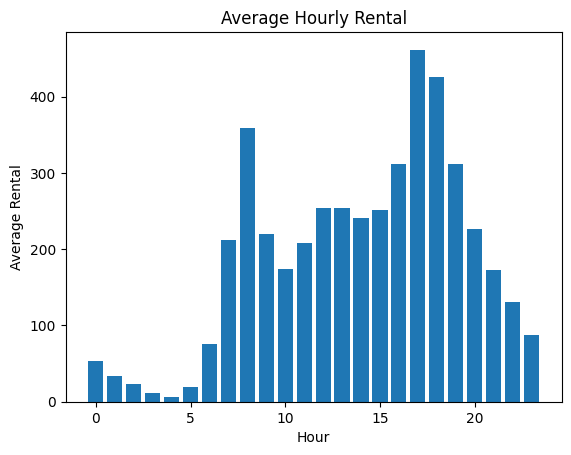

In [39]:
hourly_rental = bike_data.groupby('hour')['cnt_hour'].mean()

plt.bar(hourly_rental.index, hourly_rental.values, color='#1f77b4')

plt.title('Average Hourly Rental')
plt.xlabel('Hour')
plt.ylabel('Average Rental')

plt.show()

Rata - rata penyewaan sepeda paling banyak terjadi pada pukul 17.00 dan 18.00. Sedangkan paling sedikit pada 4.00

Berdasarkan range waktu pagi - siang :
- Rata - rata penyewaan sepeda paling banyak pukul 8 dan 9 pagi

Berdasarkan range waktu siang - sore : 
- Rata - rata penyewaan sepeda paling banyak pukul 5 dan 6 sore

Asumsi : 
- Pengguna jasa penyewaan sepeda menggunakan jasa ini untuk berangkat dan pulang bekerja. 
- Demografi pengguna jasa penyewaan sepeda adalah para pekerja

#### 2. Bagaimana hubungan kondisi cuaca dengan jumlah rata - rata persewaan?

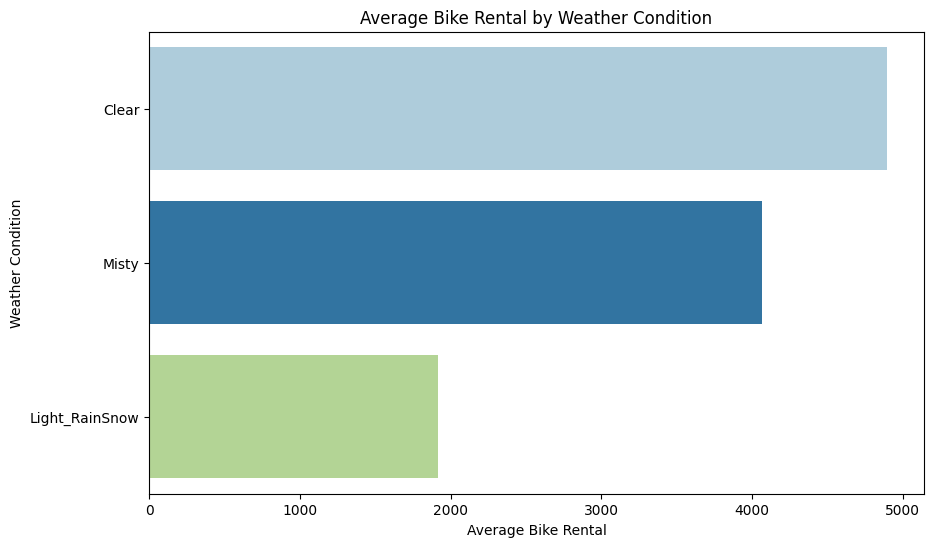

In [65]:
weather_rental = bike_data.groupby('weathersit_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")
plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weathersit_day', data=weather_rental, palette='Paired')

plt.title('Average Bike Rental by Weather Condition')
plt.xlabel('Average Bike Rental')
plt.ylabel('Weather Condition')

plt.show()

Kondisi cuaca sangat berhubungan dengan jumlah rata - rata penyewaan sepeda. Jumlah rata - rata penyewaan sepeda paling banyak terjadi saat cuaca cerah dan paling sedikit terjadi saat hujan ringan.

#### 3. Bagaimana hubungan antara hari libur tertentu dengan rata - rata penyewaan?

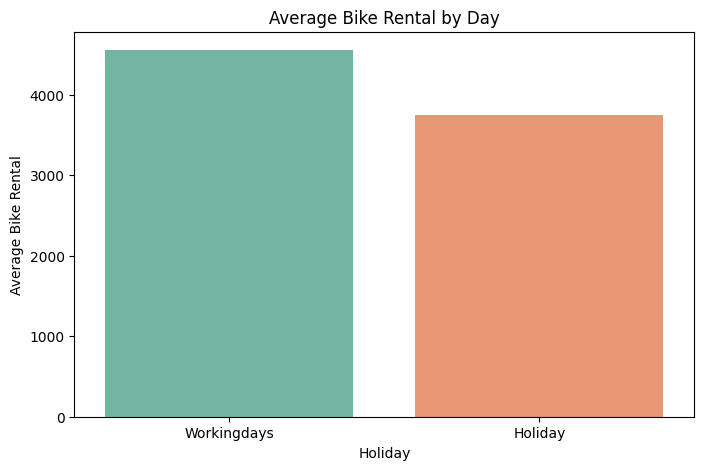

In [70]:
holiday_rental = bike_data.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_day', y='cnt_day', data=holiday_rental, palette='Set2')

plt.title('Average Bike Rental by Day')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Rental')
plt.xticks([0, 1], ['Workingdays', 'Holiday'])

plt.show()

Rata - rata penyewaan terjadi di hari biasa / non-holiday

Asumsi:
- saat holiday penduduk setempat lebih memilih untuk pergi ke luar kota

#### 4. Pada bulan apa terjadi order terbanyak dalam periode 1 tahun?

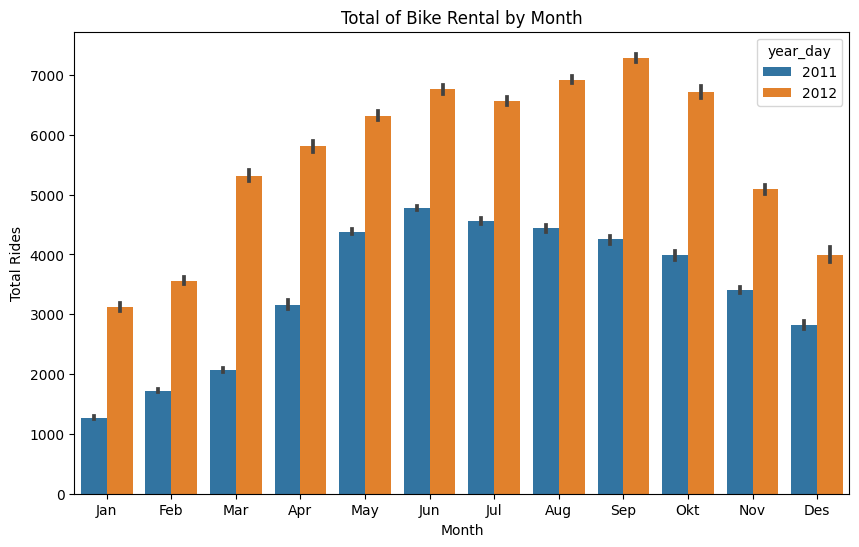

In [76]:
monthly_rental = bike_data.groupby('month_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")
plt.figure(figsize=(10, 6))

sns.barplot(x='month_day', y='cnt_day', data=bike_data, hue='year_day')

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total of Bike Rental by Month")

plt.show()

- Jumlah order bike rental terbanyak pada tahun 2011 terjadi pada bulan Juni
- Jumlah order bike rental terbanyak pada tahun 2012 terjadi pada bulan September

#### 5. Pada musim apa terjadi order terbanyak dalam periode 1 tahun?

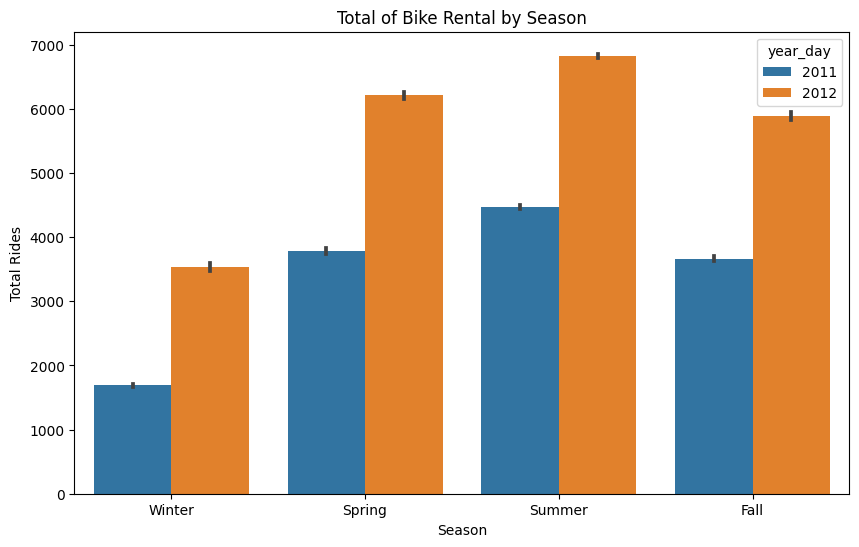

In [89]:
seasonal_rental = bike_data.groupby('season_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")
plt.figure(figsize=(10, 6))

sns.barplot(x='season_day', y='cnt_day', data=bike_data, hue='year_day')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total of Bike Rental by Season")

plt.show()

- Jumlah order bike rental terbanyak pada kedua tahun (2011 dan 2012) terjadi pada musim panas

#### 6. Bagaimana korelasi antara suhu terhadap total order bike riding?

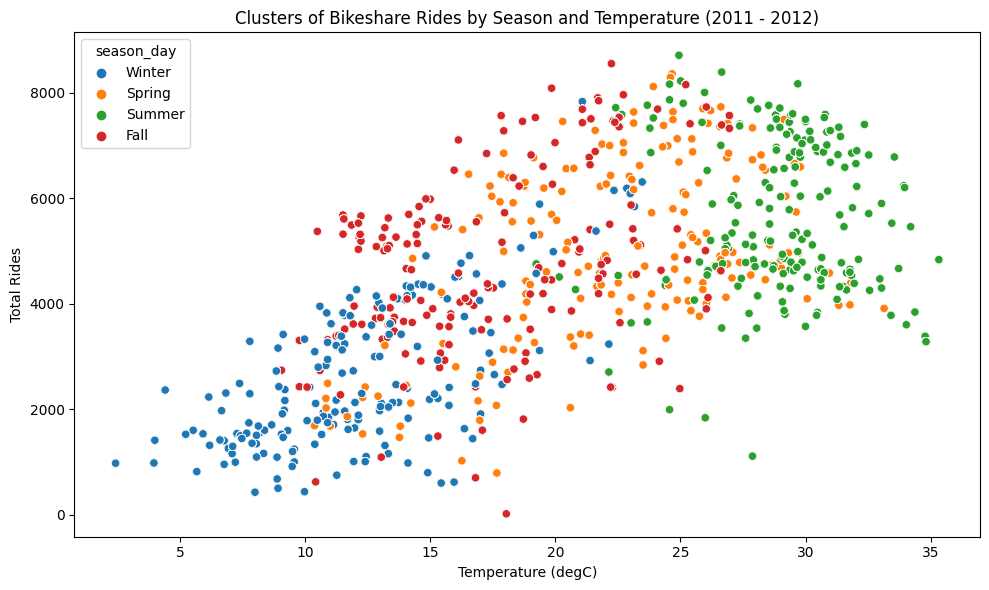

In [91]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='temp_day', y='cnt_day', data=bike_data, hue='season_day')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of Bikeshare Rides by Season and Temperature (2011 - 2012)")

plt.tight_layout()
plt.show()

- Order bike sharing memiliki nilai minimum saat musim dingin atau winter
- Semakin naiknya temperature atau suhu udara, order bike sharing semakin meningkat hingga pada puncaknya mencapai nilai maksimal saat musim panas atau summer
- Order bike sharing paling banyak terjadi saat suhu udara berkisar pada 20 - 30 derajat celcius yakni pada musim panas dan musim gugur. 

## Conclusion

##### Conclusion Business Question 1

Rata - rata penyewaan sepeda paling banyak terjadi pada pukul 17.00 dan 18.00 dan paling sedikit pada pukul 04.00

Jika rata - rata penyewaan dilihat dari range waktu pagi dan sore akan menghasilkan insight sebagai berikut:
- Di waktu pagi, rata - rata penyewaan paling banyak terjadi pada pukul 08.00 dan 09.00. Insight ini bisa diasumsikan para pengguna yang menyewa sepeda adalah mereka yang melakukan perjalanan menuju tempat kerja
- Di waktu sore, rata - rata penyewaan paling banyak terjadi pada pukul 17.00 dan 18.00. Insight ini bisa diasumsikan para pengguna yang menyewa sepeda adalah mereka yang melakukan perjalanan pulang dari tempat kerja

Dapat disimpulkan bahwa rata - rata pengguna harian penyewaan sepeda adalah para pekerja yang menggunakannya sebagai moda untuk pergi-pulang bekerja

##### Conclusion Business Question 2

Kondisi cuaca sangat berhubungan dengan jumlah rata - rata penggunaan penyewaa sepeda. Jumlah rata - rata penyewaan sepeda paling banyak terjadi saat cuaca cerah sedangkan jumlah rata - rata penyewaan sepeda paling sedikit terjadi saat hujan ringan.

Dapat diasumsikan bahwa pengguna penyewaan sepeda akan menggunakan transportasi lain ketika cuaca sedang hujan ringan.

##### Conclusion Business Question 3

Rata - rata penyewaan sepeda paling banyak terjadi di workingdays dibanding dengan holiday. 

Bisa diasumsikan bahwa menurut business question nomor 1, rata - rata pengguna penyewaan sepeda adalah para pekerja sehingga di hari libur mereka tidak menggunakan penyewaan sepeda karena tidak ada kepentingan untuk menuju ke kantor. 

Sehingga, bisa disimpulkan bahwa jumlah rata - rata pengguna penyewaan sepeda paling banyak terjadi pada hari kerja karena digunakan oleh para pekerja. Sedangkan penggunaan penyewaan sepeda di hari libur digunakan oleh para wisatawan atau siapa pun yang memerlukan sewa sepeda di hari libur.

##### Conclusion Business Question 4

Dari insight yang ditemukan, dapat disimpulkan bahwa pada tahun 2011, jumlah rata - rata pengguna penyewaan sepeda paling banyak terjadi di bulan Juni. Sedangkan pada tahun 2012, jumlah rata - rata pengguna penyewaan sepeda paling banyak terjadi di bulan September. 

##### Conclusion Business Question 5

Dari insight yang ditemukan, dapat disimpulkan bahwa jumlah penggunaan penyewaan sepeda pada kedua tahun 2011 dan 2012 sama - sama terjadi di musim panas atau summer. Ini berkaitan dengan musim panas identik dengan cuaca yang cerah karena penggunaan penyewaan sepeda lebih cocok di cuaca yang cerah. 

##### Conclusion Business Question 6

Dari insight dan persebaran data yang ditemukan, didapatkan beberapa kesimpulan sebagai berikut:
- Penggunaan penyewaan sepeda mengalami jumlah minimum saat musim dingin atau winter. Ini sesuai dengan musim dingin yang identik dengan suhu udara yang dingin sehingga kebanyakan orang lebih banyak memilih menggunakan transportasi umum.
- Penggunaan penyewaan sepeda mengalami jumlah maksimal saat musim panas atau summer. Ini sesuai engan musim panas yang identik dengan cuaca yang cerah sehingga kebanyakan orang lebih banyak memilih menggunakan penyewaan ini.
- Semakin tinggi suhu udara, penggunaan penyewaan sepeda ini semakin banyak hingga mencapai angka maksimum di musim panas dan di musim gugur dengan suhu berkisar 20 - 30 derajat celcius.

In [86]:
bike_data.to_csv("bike_data.csv", index=False)

In [87]:
pip install pipreqsnb

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pipreqsnb: filename=pipreqsnb-0.2.4-py3-none-any.whl size=4144 sha256=26be2e8ca38abb9217c8ae0fbd7d09d67f03dc898920a2654b3825097657feef
  Stored in directory: c:\users\m s i\appdata\local\pip\cache\wheels\48\2a\a3\6caa16bfb260624b06acb2a0eeb0bc45c2cd2f0ee2b5ac2d84
  Created wheel for docopt: filename=docopt-0.6.2-py2.py


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
